In [1]:
from data_loader.lfp_loader import LFP_LOADER

lfp_ldr = LFP_LOADER()

filter_notch=[50.0, 30.0]
filter_lowpass=[300.0, 4] 
zscore=False
outliers=False
outlier_limit=5

df_lfps = lfp_ldr.loading_pipeline(
    filter_notch=filter_notch, 
    filter_lowpass=filter_lowpass, 
    zscore=zscore,
    outliers=outliers
)

Epiphyte Tube version loaded.
Connecting fkaltenberger@134.2.168.111:3306

Start loading pipeline for LFP data: 
 	 > patients: [66]
 	 > fetched information: ['patient_id', 'session_nr', 'csc_nr', 'samples', 'timestamps', 'brain_region']


KeyboardInterrupt: 

In [2]:
lfp_startstop_times = lfp_ldr.get_start_stop_times()
#lfp_startstop_times = {'66': [1444507, 6407492, 118858083.322, 123821069.922]}
lfp_startstop_times

{}

In [2]:
from data_loader.spike_loader import SPIKE_LOADER
spike_ldr = SPIKE_LOADER()

bin_size = 1
df_spikes = spike_ldr.loading_pipeline(lfp_startstop_times, bin_size)

Epiphyte Tube version loaded.
Connecting fkaltenberger@134.2.168.111:3306

Start loading pipeline for spike data: 
 	 > patients: [66]
 	 > fetched information: ['patient_id', 'session_nr', 'unit_id', 'spike_times']
Spike data loaded.
Spike data clipped to movie.
Spike data binned to bins of approx. 1ms
Total of 679391 spikes.
End of loading pipeline.



In [ ]:
df_spikes["bin1_cnt"].copy().sum().sum()

679391

In [253]:
npnp.ones(0) * 2

array([], dtype=float64)

In [221]:
from data_prep.data_preparation import DATA_PREP
preper = DATA_PREP()
use_S_spikes=True
use_M_spikes=False
selected_channels=[5, 13, 36, 40, 60, 64, 79]
#selected_channels=None
df_lfps_compr, df_spikes_compr = preper.compress_dataset(
    df_lfps, 
    df_spikes, 
    bin_size,
    use_S_spikes=use_S_spikes, 
    selected_channels=selected_channels
)

In [222]:
df_lfps_compr.head()

,patient_id,session_nr,csc_nr,samples,timestamps,brain_region,movie_timestamps,movie_times,movie_samples,filtered
0,66,1,5,"[-8.413394433973691, -0.037944228473827606, 0....","[117413594184.0, 117413595184.00008, 117413596...",LA5,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[6.0684185380560365, 4.566757940340394, 8.7837...","[7.790770432717207, 6.728938414568814, 8.23944..."
1,66,1,13,"[36.429464459633955, 39.36434250115869, 41.459...","[117413594184.0, 117413595184.00008, 117413596...",LAH5,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[-62.947384753583286, -72.60517906985635, -77....","[-58.03656477506443, -66.77147502149184, -73.8..."
2,66,1,36,"[40.208643861393206, 40.97115426654183, 22.749...","[117413594184.0, 117413595184.00008, 117413596...",LPHC4,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[33.64375824944287, 3.8745550694879785, -2.214...","[31.577762088743253, 5.994499123583697, -3.526..."
3,66,1,40,"[-72.55719149271754, -69.84428070520485, -68.0...","[117413594184.0, 117413595184.00008, 117413596...",LPHC8,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[27.204928953976715, 19.943068360922965, 20.44...","[23.839298350918426, 19.25996305222699, 15.423..."
4,66,1,60,"[155.40492521893748, 161.6805353503045, 170.31...","[117413594184.0, 117413595184.00008, 117413596...",REC4,"[118858083.90916708, 118858084.90916714, 11885...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[-134.36851206557955, -132.05151280363026, -12...","[-133.62630565130885, -132.4744539429708, -124..."


In [223]:
print(df_spikes_compr["bin1_cnt"].copy().sum().sum())
df_spikes_compr.head(10)

98934


,patient_id,session_nr,unit_id,spike_times,spike_movie_timestamps,bin1_cnt
0,66,1,[ 8 9 10],"[117413852.24064063, 117413889.01432227, 11741...","[118858108.60231641, 118858284.20046094, 11885...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,66,1,[31 32 33],"[117415738.59417969, 117415749.8856836, 117417...","[118858316.27443555, 118858348.53151563, 11885...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,66,1,[69 70],"[117413605.13981055, 117413667.88395117, 11741...","[118858224.11134961, 118858232.29006055, 11885...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,66,1,[83],"[117433488.38555664, 117469926.35532032, 11746...","[118862072.25688086, 118862106.77226172, 11886...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,66,1,[112],"[117413750.03727148, 117413935.88932227, 11741...","[118896273.6523789, 118896314.05765234, 118899...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,66,1,[129],"[117425870.89088085, 117427025.06568554, 11742...","[118858907.21681836, 118860208.88307813, 11886...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
6,66,1,[142 143 144],"[117413772.49820898, 117413859.2596836, 117413...","[118858202.44386914, 118858223.0127168, 118858...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [235]:
start_sec = 0 
stop_sec = 4962985

df_lfps_compr["movie_times"] = df_lfps_compr["movie_times"].apply(
    lambda x : x[start_sec * 1000:stop_sec * 1000]
)

df_lfps_compr["filtered"] = df_lfps_compr["filtered"].apply(
    lambda x : x[start_sec * 1000:stop_sec * 1000]
)

df_spikes_compr["bin1_cnt"] = df_spikes_compr["bin1_cnt"].apply(
    lambda x : x[start_sec * 1000:stop_sec * 1000]
)

df_spikes_compr["bin1_cnt"] = df_spikes_compr["bin1_cnt"].apply(
    lambda x : x[start_sec * 1000:stop_sec * 1000][:-1]
)

In [236]:
df_spikes_compr["bin1_cnt"][3].size

4962985

In [239]:
import scipy.io as sio

destination_folder_path = "data/lfp_data/"
file_name = "p66_lfps_whole"
if selected_channels: 
    for c in selected_channels: 
        file_name += f"c{c}"
else:
    file_name += "allCSC"
file_name += f"sec{start_sec}to{stop_sec}"
file_name += f"_notch{filter_notch[0]}" if filter_notch else ""
file_name += f"_lowpass{filter_lowpass[0]}" if filter_lowpass else "" 
file_name += "zscored" if zscore else ""
file_name += f"outs{outlier_limit}" if outliers else "" 

save_cols_lfps = ["patient_id", "csc_nr", "brain_region", "movie_times", "filtered"]
sio.savemat(
    destination_folder_path+file_name+'.mat', 
    {name: col.values for name, col in df_lfps_compr.items() if name in save_cols_lfps}
)

lfp_ldr.save_lfps(df_lfps_compr, destination_folder_path+file_name)


In [240]:
destination_folder_path = "data/spikes_data/"
file_name = "p66_spikes_whole"
if selected_channels: 
    for c in selected_channels: 
        file_name += f"c{c}"
else:
    file_name += "allCSC"
file_name += f"sec{start_sec}to{stop_sec}"
file_name += f"_bin{bin_size}"
file_name += "_SUA" if use_S_spikes else ""
file_name += "_MUA" if use_M_spikes else ""

save_cols_spikes = ["patient_id", "unit_id", "bin1_cnt"]
sio.savemat(
    destination_folder_path+file_name+'.mat', 
    {name: col.values for name, col in df_spikes_compr.items() if name in save_cols_spikes}
)

spike_ldr.save_spikes(df_spikes_compr, destination_folder_path+file_name)

In [245]:
for c, br, u in zip(df_lfps_compr["csc_nr"], df_lfps_compr["brain_region"], df_spikes_compr["unit_id"]):
    print(f"channel {c} from brain region {br} with spikes from units {u}")

channel 5 from brain region LA5 with spikes from units [ 8  9 10]
channel 13 from brain region LAH5 with spikes from units [31 32 33]
channel 36 from brain region LPHC4 with spikes from units [69 70]
channel 40 from brain region LPHC8 with spikes from units [83]
channel 60 from brain region REC4 with spikes from units [112]
channel 64 from brain region REC8 with spikes from units [129]
channel 79 from brain region RMH7 with spikes from units [142 143 144]


In [214]:
from random import randint
import matplotlib.pyplot as plt

def plot_lfps(data, csc_nrs, start, stop, x_name, y_name):
    data = data.copy()
    
    len_c = len(csc_nrs)
    lst_c = list(range(len_c))

    #spike_colors = ["red", "blue", "green", "orange", "violet"]
    lfp_colors = []
    for i in range(len_c):
        lfp_colors.append('#%06X' % randint(0, 0xFFFFFF))

    ## set up frame for data ##

    fig, axs = plt.subplots(len_c,1, figsize=(16,len_c*2))

    for i in lst_c: 
        ## data ##
        cs = csc_nrs[i]
        movie_times = data[(data['csc_nr']== cs)][x_name].to_numpy()[0][start:stop]#S/1000
        zscored = data[(data['csc_nr']== cs)][y_name].to_numpy()[0][start:stop]
        #df_lfp_i = df_lfps[(df_lfps['csc_nr']== cs) & (df_lfps['timestamps'] > lfp_time_start) & (df_lfps['timestamps'] < lfp_time_end)]

        ## fig prep ##
        axs[i].set_title(f'csc_nr : {cs}', fontweight='bold')
        axs[i].set_xlabel('', fontweight='light')
        axs[i].set_ylabel('', fontweight='light')

        ## plot ##
        axs[i].plot(movie_times, zscored, color=lfp_colors[i])

    plt.subplots_adjust(hspace=0.75)
    
    

def plot_spikes(data, unit_idx, start, stop, x_times, y_name):
    data = data.copy()
    
    len_u = len(unit_idx)
    lst_u = list(range(len_u))
    spike_linelengths=[0.5] * len_u

    #spike_colors = ["red", "blue", "green", "orange", "violet"]
    spike_colors = []
    for i in range(len_u):
        spike_colors.append('#%06X' % randint(0, 0xFFFFFF))


    ## set up frame for data ##

    fig, axs = plt.subplots(1,1, figsize=(16,len_u*0.75))
    axs.set_yticks(lst_u)
    axs.set_yticklabels(data["unit_id"][unit_idx])
    axs.set_ylabel('units', fontweight='light')
    axs.set_xlabel('recording time', fontweight='light')
    axs.set_title('spikes selected by index', fontweight='bold')


    ## get data ##

    plt_spike_dt_time = []
    min_time = 1000000000000000
    max_time = 0
    for i in unit_idx: 
        if y_name=="bin1_cnt":
            c_spike_times = x_times[i][start:stop][
                (data[y_name][i][start:stop]).astype(dtype=bool)
            ]
        plt_spike_dt_time.append(c_spike_times)
        if len(c_spike_times) != 0:
            c_min = min(plt_spike_dt_time[-1])
            c_max = max(plt_spike_dt_time[-1])
            min_time = c_min if (c_min<min_time) else min_time
            max_time = c_max if (c_max>max_time) else max_time


    ## plot data ##

    axs.eventplot(plt_spike_dt_time, color=spike_colors, linelengths=spike_linelengths)

    for i in lst_u: 
        axs.plot([min_time, max_time], [i, i], "black", linewidth=0.2)


        
def plot_lfp_with_spikes(lfps, spikes, csc_nrs, start, stop, x_name, y_lfp, y_spike): 
    lfps = lfps.copy()
    spikes = spikes.copy()
    
    x_times = lfps[x_name]
    unit_idx = lfps.index[lfps["csc_nr"].isin(csc_nrs)].to_numpy()
    
    len_c = len(csc_nrs)
    lst_c = list(range(len_c))
    
    #len_u = len(unit_idx)
    #lst_u = list(range(len_u))
    spike_linelength = 1.25

    #spike_colors = ["red", "blue", "green", "orange", "violet"]
    lfp_colors = []
    for i in range(len_c):
        lfp_colors.append('#%06X' % randint(0, 0xFFFFFF))
        
    ## set up frame for data ##

    fig, axs = plt.subplots(len_c,1, figsize=(16,len_c*2))
    fig.suptitle("LFP data and spikes for different channels", fontweight='bold', fontsize=20)
    fig.supxlabel('movie times [s]', fontweight='light', fontsize=20)
    fig.supylabel('voltage', fontweight='light', fontsize=20)
 
    plt_spike_dt_time = []
    min_time = 1000000000000000
    max_time = 0

    for i, j in zip(lst_c, unit_idx): 
        ## data ##
        cs = csc_nrs[i]
        movie_times = lfps[(lfps['csc_nr']== cs)][x_name].to_numpy()[0][start:stop]/1000
        zscored = lfps[(lfps['csc_nr']== cs)][y_lfp].to_numpy()[0][start:stop]
        #df_lfp_i = df_lfps[(df_lfps['csc_nr']== cs) & (df_lfps['timestamps'] > lfp_time_start) & (df_lfps['timestamps'] < lfp_time_end)]
        
        c_spike_times = x_times[j][start:stop][
            (spikes[y_spike][j][start:stop]).astype(dtype=bool)
        ]/1000
        #plt_spike_dt_time.append(c_spike_times)
       
        
        ## fig prep ##
        axs[i].set_title(f'channel {cs}', fontweight='bold')
        #axs[i].set_xlabel('movie times [s]', fontweight='light')
        #axs[i].set_ylabel('voltage', fontweight='light')

        ## plot ##
        axs[i].plot(movie_times, zscored, color=lfp_colors[i])
        axs[i].set_ylim(int(zscored.min())-800, int(zscored.max())+300)
        axsj = axs[i].twinx()
        
        #axsj.plot(spikes[y_spike][j][start:stop])
        
        axsj.set_ylim(-1, 2)
        axsj.set_yticks([-0.5])
        axsj.set_yticklabels(["spikes"])
        axsj.eventplot(c_spike_times, lineoffset=-1, linelengths=spike_linelength)#, color=lfp_colors[i], linelengths=spike_linelengths)
        

    plt.subplots_adjust(hspace=0.75)
    
        


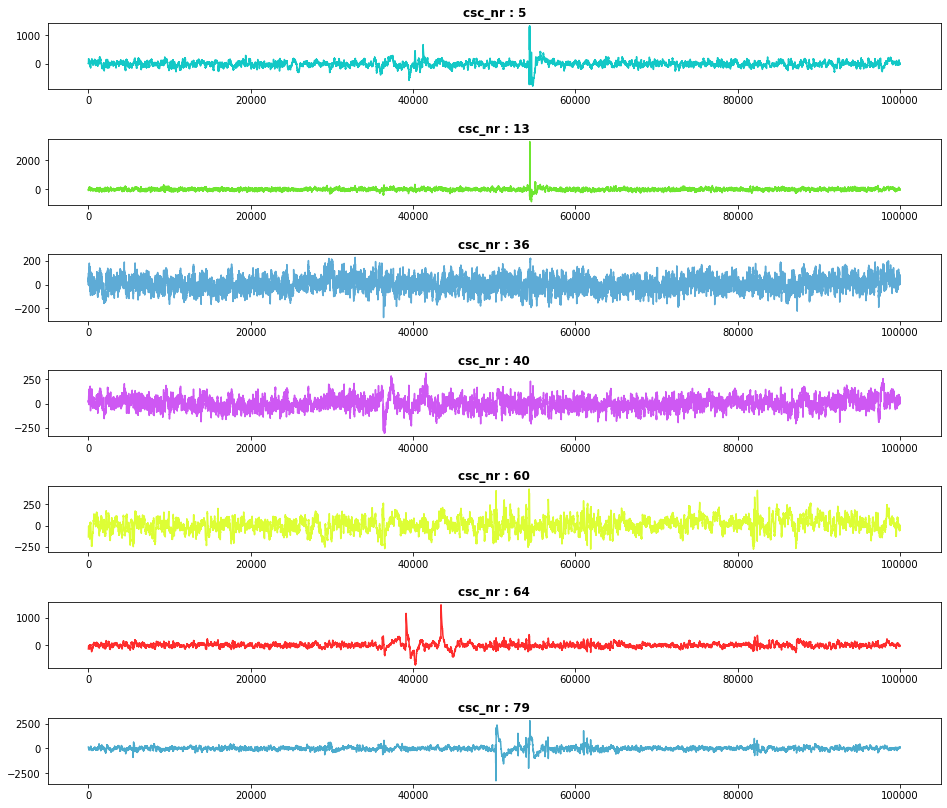

In [215]:
csc_nrs = df_lfps_compr["csc_nr"].tolist()
plot_lfps(df_lfps_compr, csc_nrs, 0, 100000, "movie_times", "filtered")

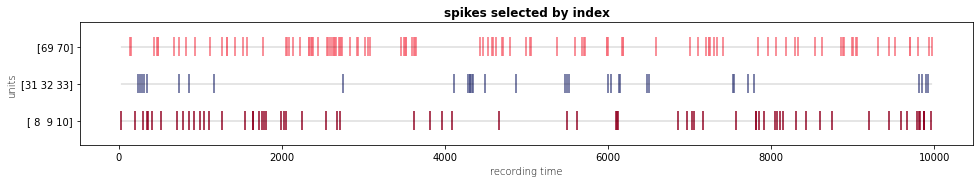

In [216]:
plot_spikes(
    df_spikes_compr, 
    [0,1,2], 
    0, 
    10000, 
    df_lfps_compr["movie_times"], 
    "bin1_cnt"
)

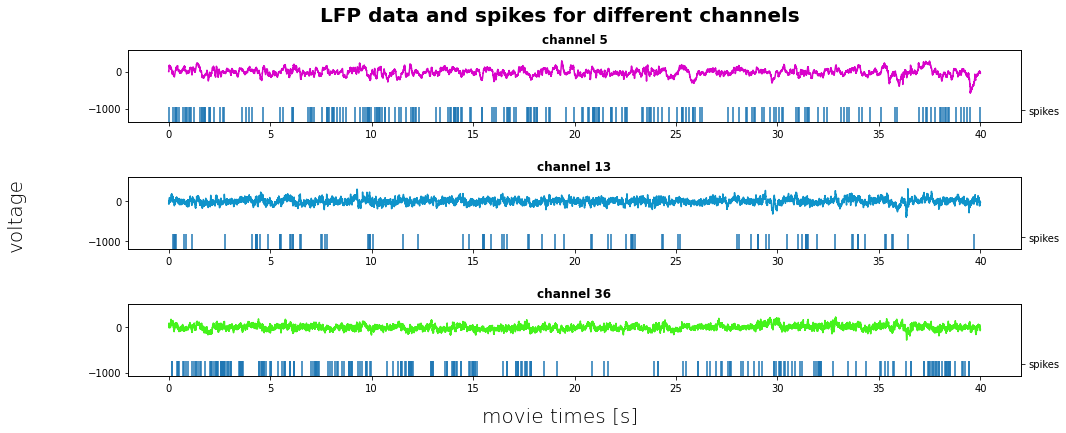

In [218]:
csc_nrs = df_lfps_compr["csc_nr"].to_numpy()[:3]
#print(csc_nrs)
#df_lfps_compr.index[df_lfps_compr["csc_nr"].isin(csc_nrs)].to_numpy()
plot_lfp_with_spikes(df_lfps_compr, df_spikes_compr, csc_nrs, 0, 40000, "movie_times", "filtered", "bin1_cnt")